In [1]:
#############################       LIBRARIES:     #############################
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time 
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
import re

In [4]:
def parse_car(link): # get link
    time.sleep(3)  # timing
    
    data_dictionary = dict()
    r = requests.get(link)
    soup = BeautifulSoup(r.content,'html.parser')  # Beautiful Soup
    
    price = soup.find('div',{"class":'heading-2 mt-1'}).get_text() # Search price
    mileage_soup = soup.find('span',{"class":'flex items-center'})
    
    mileage_trash = mileage_soup.find('span').get_text()  # Delete symbols
    mileage = mileage_soup.get_text().replace(mileage_trash,'')
    mileage = mileage.replace('miles','')
    mileage = mileage.replace(',','')   # Delete ','

    data = soup.find('div',{"class": 'heading-3_5 heading-md-2 mb-1 lg:mb-2'}).get_text().split() # year, brand, model
    #print(data)
    year = data[0]
    marka = data[1]
    model = ' '.join(data[2:])

    conteiners = soup.find_all('div',{'class':'mt-2-5 flex items-center'})    #classes of images(if image is not exist, dont't take a feature) 
    
    for conteiner in conteiners:
        svg = conteiner.find('svg',{'class': 'icon mr-3 icon-fill-default'}) 
        if svg is not None:                                                   #if image exists do 
            data = conteiner.find('p').get_text().split(',')
            print(data)
            break
    else:
        data = None    
    
    owners = None # owners
    
    #cheking of data about owners and accidents(counters)
    if data[0] == 'Certified Pre-Owned':         # IF car like is new, owner == 1, accidents == 0
        accidents = 0
        owners = 1
    else:
        accidents = data[0]                      # How much accidents 
        if accidents == 'No accidents reported': # IF car have 0 accidents
            accidents = 0 
        else:
            accidents = accidents.split()[0]
    if owners is None:
        owners = data[1].split()[0]
    
     ################### Car's features inside(8) ##################
    overview_soup = soup.find('div',{'class':'py-5'}) 
    flex_soup_list = overview_soup.find_all('div',{'class':'flex flex-col'})
    
    for flex_soup in flex_soup_list:
        property_name = flex_soup.find('div',{'class':'heading-4'}).get_text() 
        property_value = flex_soup.find('p',{'class':'text-base'}).get_text()
        print(property_name,property_value)
        data_dictionary[property_name] = property_value

    print('accidents:',accidents)
    data_dictionary['accidents'] = accidents
    print('owners:',owners)
    data_dictionary['owners'] = owners
    print('year:',year)
    data_dictionary['year'] = year
    print('marka:',marka)
    data_dictionary['marka'] = marka
    print('model:',model)
    data_dictionary['model'] = model
    print('price:',price)
    data_dictionary['price'] = price
    print('mileage:', mileage)
    data_dictionary['mileage'] = mileage
    print()
    return data_dictionary

In [5]:
domen = 'https://www.truecar.com' # Our website
to_csv = []

for page in range(1,201): # pages
    url = f'https://www.truecar.com/used-cars-for-sale/listings/toyota/?page={page}' #index of pages
    r = requests.get(url)
    soup = BeautifulSoup(r.content,'html.parser') #Beatiful Soup
    links_soup = soup.find_all('a',{"class":"linkable vehicle-card-overlay order-2"})
    links = []
    
    for a in links_soup:
        links.append(domen + a['href'])  # Links of every pages
    for link in links:
        try:
            data_dictionary = parse_car(link) #function returns dict of one car 
            to_csv.append(data_dictionary)    #list of dicts of cars
        except Exception as e:                #if we get error , print error
            print(e) 
        print()

json_str = json.dumps(to_csv)
json_file = open('data.json','w') # saving in format json
json_file.write(json_str)
json_file.close()       

https://www.truecar.com/used-cars-for-sale/listing/3MYDLBYV5KY509239/2019-toyota-yaris/?sponsoredVehiclePosition=0&zipcode=02818
['2019', 'Toyota', 'Yaris']
['No accidents reported', ' 2 owners']
Style Sedan
Exterior Color Graphite
Interior Color Blue
MPG 32 cty / 40 hwy
Engine 1.5L Inline-4 Gas
Drive Type FWD
Fuel Type Gas
Transmission Automatic
accidents: 0
owners: 2
year: 2019
marka: Toyota
model: Yaris
price: $19,999
mileage: 21840 


https://www.truecar.com/used-cars-for-sale/listing/4T1B11HKXKU707633/2019-toyota-camry/?sponsoredVehiclePosition=1
['2019', 'Toyota', 'Camry']
['1 accident', ' 2 owners']
Style Sedan
Exterior Color Celestial Silver Metallic
Interior Color Black
MPG 28 cty / 39 hwy
Engine 2.5L Inline-4 Gas
Drive Type FWD
Fuel Type Gas
Transmission Automatic
accidents: 1
owners: 2
year: 2019
marka: Toyota
model: Camry
price: $18,182
mileage: 103386 


https://www.truecar.com/used-cars-for-sale/listing/JTDEPMAE3NJ219734/2022-toyota-corolla/?sponsoredVehiclePosition=2
['2

In [71]:
json_path = r'C:\Users\User\Desktop\project.json'
csv_path = r'C:\Users\User\Desktop\project.csv'

with open(json_path) as f:
    data = json.load(f)              # load data from json file

df = pd.DataFrame(data)              # create Data Frame

df.to_csv(csv_path, index = False)   # save Data Frame in csv format

df = pd.read_csv(csv_path)

In [2]:
############################# load Data Frame after parsing: #############################
df = pd.read_csv('project.csv')
display(df)

Style             Exterior Color Interior Color              MPG  \
0     Sedan                   Graphite           Blue  32 cty / 40 hwy   
1     Sedan  Celestial Silver Metallic          Black  28 cty / 39 hwy   
2     Sedan           Black Sand Pearl     Light Gray  30 cty / 38 hwy   
3     Sedan                      White            Tan  51 cty / 48 hwy   
4     Sedan    Classic Silver Metallic     Light Gray  30 cty / 38 hwy   
...     ...                        ...            ...              ...   
5954  Sedan                        Red          Black  28 cty / 36 hwy   
5955  Sedan           Cosmic Gray Mica          Black  25 cty / 35 hwy   
5956  Sedan    Midnight Black Metallic          Black  25 cty / 35 hwy   
5957  Sedan  Celestial Silver Metallic          Black  28 cty / 39 hwy   
5958    SUV     Magnetic Gray Metallic          Black  27 cty / 35 hwy   

                    Engine Drive Type Fuel Type Transmission  accidents  \
0        1.5L Inline-4 Gas        FWD       Gas    Automatic          0   
1        2.5L Inline-4 Gas        FWD       Gas    Automatic          1   
2        1.8L Inline-4 Gas        FWD       Gas    Automatic          0   
3     1.8L Inline-4 Hybrid        FWD    Hybrid    Automatic          0   
4        1.8L Inline-4 Gas        FWD       Gas    Automatic          0   
...                    ...        ...       ...          ...        ...   
5954     1.8L Inline-4 Gas        FWD       Gas    Automatic          0   
5955     2.5L Inline-4 Gas        FWD       Gas    Automatic          0   
5956     2.5L Inline-4 Gas        FWD       Gas    Automatic          1   
5957     2.5L Inline-4 Gas        FWD       Gas    Automatic          0   
5958     2.5L Inline-4 Gas        FWD       Gas    Automatic          0   

      owners  year   brand    model     price  mileage Cab Type Bed Length  \
0          2  2019  Toyota    Yaris  $19,999     21840      NaN        NaN   
1          2  2019  Toyota    Camry  $18,182    103386      NaN        NaN   
2          1  2022  Toyota  Corolla  $21,950     21320      NaN        NaN   
3          3  2010  Toyota    Prius   $9,991    130678      NaN        NaN   
4          1  2020  Toyota  Corolla  $17,749     57515      NaN        NaN   
...      ...   ...     ...      ...       ...      ...      ...        ...   
5954       2  2017  Toyota  Corolla  $18,999     67945      NaN        NaN   
5955       2  2016  Toyota    Camry  $20,998     37479      NaN        NaN   
5956       2  2016  Toyota    Camry  $14,644    129263      NaN        NaN   
5957       1  2021  Toyota    Camry  $25,984     30901      NaN        NaN   
5958       1  2021  Toyota     RAV4  $30,998     11205      NaN        NaN   

     Range  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  
...    ...  
5954   NaN  
5955   NaN  
5956   NaN  
5957   NaN  
5958   NaN  

[5959 rows x 18 columns]

In [3]:
############################# Cleaning DF from features that we don't have: #############################
df= df.drop('Cab Type',axis = 1)
df= df.drop('Bed Length',axis = 1)
df= df.drop('Range',axis = 1)

In [4]:
############################# Working on Data Frame's features: #############################
df['price'] = df['price'].str.replace('[^\d.]', '', regex=True).astype(int)  # remove '$' from feature 'price'
df['Engine'] = df['Engine'].str.extract('(\d+\.?\d*)').astype(float)         # remove letters in 'Engine'
df.loc[df['model'] == 'Mirai', 'Engine'] = 0  

In [5]:
df['MPG'] = df['MPG'].str.replace(' cty /', '').str.replace(' hwy', '')  # remove letters and synbols in 'MPG'

In [6]:
def divide_mpg(mpg):
    if isinstance(mpg, str):
        numbers = mpg.split(' ')
        if len(numbers) == 2:
            try:
                result = float(numbers[0]) / float(numbers[1])
                return result
            except ZeroDivisionError:
                return None
    return None

df['MPG'] = df['MPG'].apply(divide_mpg)  # div of two numbers in 'MPG'


In [7]:
############################# Data Frame before cleaning: #############################
display(df)

Style             Exterior Color Interior Color       MPG  Engine  \
0     Sedan                   Graphite           Blue  0.800000     1.5   
1     Sedan  Celestial Silver Metallic          Black  0.717949     2.5   
2     Sedan           Black Sand Pearl     Light Gray  0.789474     1.8   
3     Sedan                      White            Tan  1.062500     1.8   
4     Sedan    Classic Silver Metallic     Light Gray  0.789474     1.8   
...     ...                        ...            ...       ...     ...   
5954  Sedan                        Red          Black  0.777778     1.8   
5955  Sedan           Cosmic Gray Mica          Black  0.714286     2.5   
5956  Sedan    Midnight Black Metallic          Black  0.714286     2.5   
5957  Sedan  Celestial Silver Metallic          Black  0.717949     2.5   
5958    SUV     Magnetic Gray Metallic          Black  0.771429     2.5   

     Drive Type Fuel Type Transmission  accidents  owners  year   brand  \
0           FWD       Gas    Automatic          0       2  2019  Toyota   
1           FWD       Gas    Automatic          1       2  2019  Toyota   
2           FWD       Gas    Automatic          0       1  2022  Toyota   
3           FWD    Hybrid    Automatic          0       3  2010  Toyota   
4           FWD       Gas    Automatic          0       1  2020  Toyota   
...         ...       ...          ...        ...     ...   ...     ...   
5954        FWD       Gas    Automatic          0       2  2017  Toyota   
5955        FWD       Gas    Automatic          0       2  2016  Toyota   
5956        FWD       Gas    Automatic          1       2  2016  Toyota   
5957        FWD       Gas    Automatic          0       1  2021  Toyota   
5958        FWD       Gas    Automatic          0       1  2021  Toyota   

        model  price  mileage  
0       Yaris  19999    21840  
1       Camry  18182   103386  
2     Corolla  21950    21320  
3       Prius   9991   130678  
4     Corolla  17749    57515  
...       ...    ...      ...  
5954  Corolla  18999    67945  
5955    Camry  20998    37479  
5956    Camry  14644   129263  
5957    Camry  25984    30901  
5958     RAV4  30998    11205  

[5959 rows x 15 columns]

In [8]:
############################# Data Frame after cleaning of "NaN" and duplicates: #############################
df = df.dropna()
df = df.drop_duplicates()
display(df)

Style             Exterior Color Interior Color       MPG  Engine  \
0     Sedan                   Graphite           Blue  0.800000     1.5   
1     Sedan  Celestial Silver Metallic          Black  0.717949     2.5   
2     Sedan           Black Sand Pearl     Light Gray  0.789474     1.8   
3     Sedan                      White            Tan  1.062500     1.8   
4     Sedan    Classic Silver Metallic     Light Gray  0.789474     1.8   
...     ...                        ...            ...       ...     ...   
5954  Sedan                        Red          Black  0.777778     1.8   
5955  Sedan           Cosmic Gray Mica          Black  0.714286     2.5   
5956  Sedan    Midnight Black Metallic          Black  0.714286     2.5   
5957  Sedan  Celestial Silver Metallic          Black  0.717949     2.5   
5958    SUV     Magnetic Gray Metallic          Black  0.771429     2.5   

     Drive Type Fuel Type Transmission  accidents  owners  year   brand  \
0           FWD       Gas    Automatic          0       2  2019  Toyota   
1           FWD       Gas    Automatic          1       2  2019  Toyota   
2           FWD       Gas    Automatic          0       1  2022  Toyota   
3           FWD    Hybrid    Automatic          0       3  2010  Toyota   
4           FWD       Gas    Automatic          0       1  2020  Toyota   
...         ...       ...          ...        ...     ...   ...     ...   
5954        FWD       Gas    Automatic          0       2  2017  Toyota   
5955        FWD       Gas    Automatic          0       2  2016  Toyota   
5956        FWD       Gas    Automatic          1       2  2016  Toyota   
5957        FWD       Gas    Automatic          0       1  2021  Toyota   
5958        FWD       Gas    Automatic          0       1  2021  Toyota   

        model  price  mileage  
0       Yaris  19999    21840  
1       Camry  18182   103386  
2     Corolla  21950    21320  
3       Prius   9991   130678  
4     Corolla  17749    57515  
...       ...    ...      ...  
5954  Corolla  18999    67945  
5955    Camry  20998    37479  
5956    Camry  14644   129263  
5957    Camry  25984    30901  
5958     RAV4  30998    11205  

[5716 rows x 15 columns]

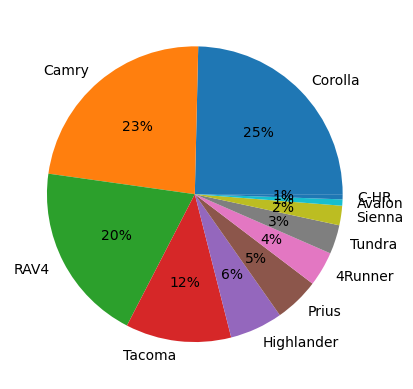

Corolla              1365
Camry                1283
RAV4                 1088
Tacoma                640
Highlander            321
Prius                 272
4Runner               210
Tundra                176
Sienna                118
Avalon                 38
C-HR                   31
FJ Cruiser             28
Venza                  21
Sequoia                19
Prius c                17
Yaris                  15
Land Cruiser           14
Camry Solara           11
Prius v                11
Mirai                  10
Corolla iM              7
Yaris iA                5
Corolla Hatchback       5
GR Supra                3
Matrix                  2
86                      2
Corolla Cross           2
Echo                    1
Crown                   1
Name: model, dtype: int64


In [9]:
############################# Pie chart Сount of every model: #############################
model_counts = df['model'].value_counts()

labels = ["Corolla","Camry","RAV4","Tacoma","Highlander","Prius","4Runner","Tundra","Sienna","Avalon","C-HR"]
sizes = model_counts[:11]
plt.pie(sizes, labels=labels,autopct='%1.0f%%')
plt.show()
print(model_counts)

In [10]:
#############################  Data Frame for 4 most popular models: #############################
df_4_most_popular = df.loc[df['model'].isin(['Corolla', 'Camry','RAV4','Tacoma'])]      # new DF of 4 most popular models

In [11]:
df_encoded = pd.get_dummies(df_4_most_popular,columns = ['model'])                       # DF with 4 columns for every model
df_learn = df_encoded.select_dtypes(include=["float64","int64","int32","uint8"])         # new DF of only numeric features
display(df_learn)

MPG  Engine  accidents  owners  year  price  mileage  model_Camry  \
1     0.717949     2.5          1       2  2019  18182   103386            1   
2     0.789474     1.8          0       1  2022  21950    21320            0   
4     0.789474     1.8          0       1  2020  17749    57515            0   
5     0.789474     1.8          1       2  2020  18979    62134            0   
7     0.789474     1.8          0       1  2021  18999    57144            0   
...        ...     ...        ...     ...   ...    ...      ...          ...   
5954  0.777778     1.8          0       2  2017  18999    67945            0   
5955  0.714286     2.5          0       2  2016  20998    37479            1   
5956  0.714286     2.5          1       2  2016  14644   129263            1   
5957  0.717949     2.5          0       1  2021  25984    30901            1   
5958  0.771429     2.5          0       1  2021  30998    11205            0   

      model_Corolla  model_RAV4  model_Tacoma  
1                 0           0             0  
2                 1           0             0  
4                 1           0             0  
5                 1           0             0  
7                 1           0             0  
...             ...         ...           ...  
5954              1           0             0  
5955              0           0             0  
5956              0           0             0  
5957              0           0             0  
5958              0           1             0  

[4376 rows x 11 columns]

Average Price for Camry: 22766.11223694466
Average Price for Corolla: 18992.802197802197
Average Price for RAV4: 28389.26011029412
Average Price for Tacoma: 34028.76875
We can see the price difference between cars based on their models


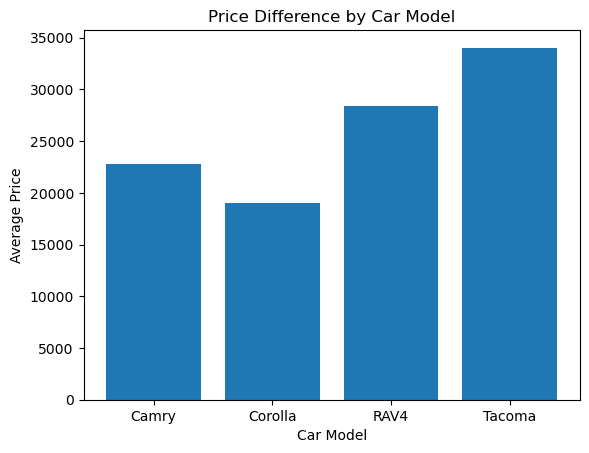

In [12]:
##################################### Average price for every model #####################################
average_price_camry = df_learn.loc[df_learn['model_Camry'] == 1, 'price'].mean()
average_price_corolla = df_learn.loc[df_learn['model_Corolla'] == 1, 'price'].mean()
average_price_RAV4 = df_learn.loc[df_learn['model_RAV4'] == 1, 'price'].mean()
average_price_Tacoma = df_learn.loc[df_learn['model_Tacoma'] == 1, 'price'].mean()

print('Average Price for Camry:', average_price_camry)
print('Average Price for Corolla:', average_price_corolla)
print('Average Price for RAV4:', average_price_RAV4)
print('Average Price for Tacoma:', average_price_Tacoma)

print('We can see the price difference between cars based on their models')

models = ['Camry', 'Corolla', 'RAV4', 'Tacoma']
average_prices = [average_price_camry, average_price_corolla, average_price_RAV4, average_price_Tacoma]

plt.bar(models, average_prices)

plt.xlabel('Car Model')
plt.ylabel('Average Price')
plt.title('Price Difference by Car Model')

plt.show()

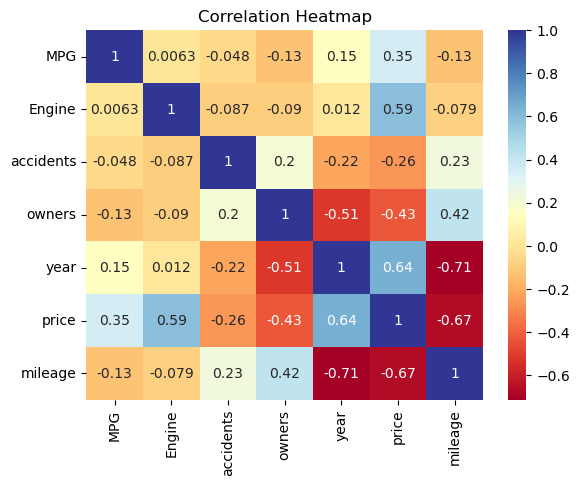

In [13]:
numerical_columns = df_learn.select_dtypes(include=[float, int]).columns
numeric_df = df_learn[numerical_columns]

correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlBu")
plt.title("Correlation Heatmap")
plt.show()

# The following observations can be made from the heat map:

# MPG (monthly miles per gallon) has a high negative correlation with Engine, 
# which means that more economical cars tend to have smaller engines.
# Price is positively correlated with Engine and year, 
# meaning that more expensive cars tend to have more powerful engines and newer years.
# Mileage is negatively correlated with year and MPG (monthly miles per gallon), 
# which means that newer cars and more economical cars tend to have lower mileage.

In [14]:
# 4 types of drive do not affect the price, for example Corolla, it has only front-wheel drive
# Style and MPG are tied to the characteristics of the Engine of a certain model, so it is enough to take the Engine
# Fuel Type is also not correct to take, because for example, since 2018, the model can only be a hybrid

In [15]:
############################# Correlation between 'Transmission' and 'Price': #############################
Transmission_codes = {'Automatic': 0, 'Manual': 1}
df_transmission = df.copy()
df_transmission['Transmission_code'] = df_transmission['Transmission'].map(Transmission_codes)

correlation = df_transmission['price'].corr(df_transmission['Transmission_code'])

print("Correlation coefficient:", correlation)

Correlation coefficient: 0.045286502097739136


In [16]:
############################# Correlation between 'Exterior Color' and 'Price': #############################
color_counts = df_4_most_popular['Exterior Color'].value_counts()
print(color_counts)

color_dummies = pd.get_dummies(df_4_most_popular['Exterior Color'], prefix='color')
data_encoded = pd.concat([df_4_most_popular, color_dummies], axis=1)

correlations = []
for column in color_dummies.columns:
    try:
        correlation = data_encoded['price'].corr(data_encoded[column])
        correlations.append(correlation)
    except TypeError:
        pass

print("Correlation between 'price' and 'Exterior Color':")
for i in range(len(correlations)):
    color = color_dummies.columns[i]
    correlation = correlations[i]
    print(f'{color}: {correlation}')

if len(correlations) > 0:
    average_correlation = sum(correlations) / len(correlations)
    print('Average correlation between price and Exterior Color:', average_correlation)
else:
    print('No valid correlations found.')

Super White                                     810
Midnight Black Metallic                         408
Magnetic Gray Metallic                          371
Classic Silver Metallic                         250
Black Sand Pearl                                246
                                               ... 
Magnetic Gray Metallic W/Midnight Black Roof      1
Brown Sugar Metallic                              1
Blue *Pano Roof*                                  1
Cavalry Blue/Midnight Black Metallic              1
Hot Lava                                          1
Name: Exterior Color, Length: 119, dtype: int64
Correlation between 'price' and 'Exterior Color':
color_49035: -0.0216024573704345
color_Aloe Green Metallic: -0.03517012659395206
color_Attitude Black: -0.045797364541478786
color_Attitude Black Metallic: -0.07937007869820273
color_Balck: -0.016078221815024652
color_Barcelona Red Metallic: -0.05861816816744527
color_Beige: -0.05342581208119658
color_Black: -0.1645780393143629


Correlation Coefficient: 0.35227916380656127
This code examines the relationship between MPG and the price of cars and calculates the correlation coefficient to assess the degree of dependence between these two variables.


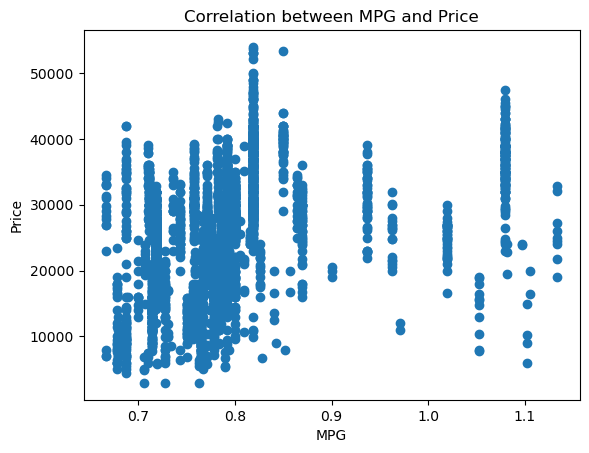

In [17]:
############################# Correlation between 'MPG' and 'Price': #############################
price = df_learn['price']
value = df_learn['MPG']

plt.scatter(value, price)
plt.xlabel('MPG')
plt.ylabel('Price')
plt.title('Correlation between MPG and Price')

corr_coef = value.corr(price)

print('Correlation Coefficient:', corr_coef)
print("This code examines the relationship between MPG and the price of cars and calculates the correlation coefficient to assess the degree of dependence between these two variables.")
plt.show()


Correlation Coefficient: -0.6727253896401031
This code examines the relationship between mileage and the price of cars and calculates the correlation coefficient to assess the degree of dependence between these two variables.


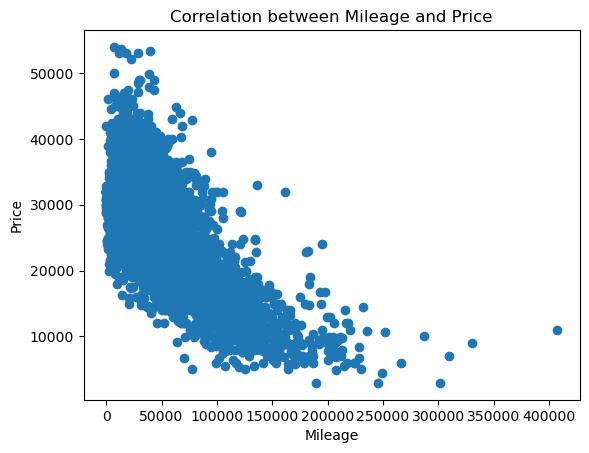

In [18]:
############################# Correlation between 'Mileage' and 'Price': #############################
price = df_learn['price']
value = df_learn['mileage']

plt.scatter(value, price)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Correlation between Mileage and Price')

corr_coef = value.corr(price)

print('Correlation Coefficient:', corr_coef)
print("This code examines the relationship between mileage and the price of cars and calculates the correlation coefficient to assess the degree of dependence between these two variables.")
plt.show()


Correlation Coefficient: -0.2622349410082534
This code examines the relationship between mileage and the price of cars and calculates the correlation coefficient to assess the degree of dependence between these two variables.


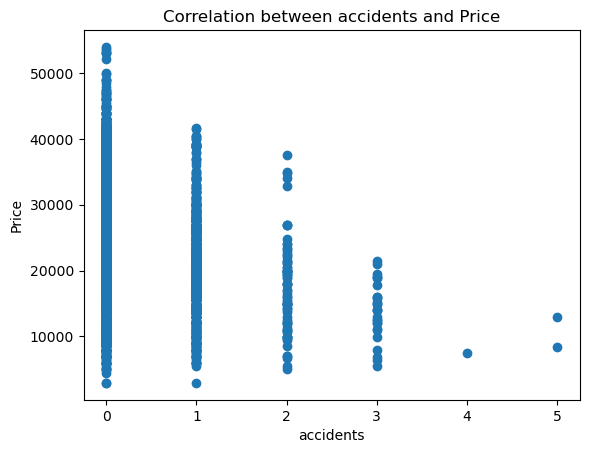

In [19]:
############################# Correlation between 'Accidents' and 'Price': #############################
price = df_learn['price']
value = df_learn['accidents']

plt.scatter(value, price)
plt.xlabel('accidents')
plt.ylabel('Price')
plt.title('Correlation between accidents and Price')

corr_coef = value.corr(price)

print('Correlation Coefficient:', corr_coef)
print("This code examines the relationship between mileage and the price of cars and calculates the correlation coefficient to assess the degree of dependence between these two variables.")

plt.show()

Correlation Coefficient: -0.42563583703473956
This code examines the relationship between owners and the price of cars and calculates the correlation coefficient to assess the degree of dependence between these two variables.


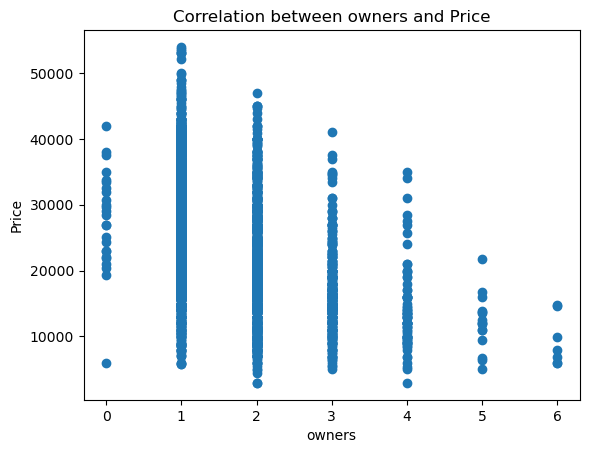

In [20]:
############################# Correlation between 'Owners' and 'Price': #############################
price = df_learn['price']
value = df_learn['owners']

plt.scatter(value, price)
plt.xlabel('owners')
plt.ylabel('Price')
plt.title('Correlation between owners and Price')

corr_coef = value.corr(price)

print('Correlation Coefficient:', corr_coef)
print("This code examines the relationship between owners and the price of cars and calculates the correlation coefficient to assess the degree of dependence between these two variables.")

plt.show()

Correlation Coefficient: 0.6432250937696818
This code examines the relationship between year and the price of cars and calculates the correlation coefficient to assess the degree of dependence between these two variables.


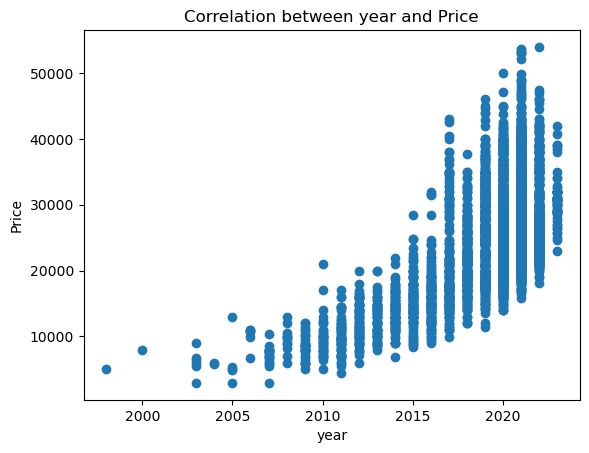

In [21]:
############################# Correlation between 'Year' and 'Price': #############################
price = df_learn['price']
value = df_learn['year']

plt.scatter(value, price)
plt.xlabel('year')
plt.ylabel('Price')
plt.title('Correlation between year and Price')

corr_coef = value.corr(price)

print('Correlation Coefficient:', corr_coef)
print("This code examines the relationship between year and the price of cars and calculates the correlation coefficient to assess the degree of dependence between these two variables.")


plt.show()

Correlation Coefficient: 0.58825935104574
This code examines the relationship between engine and the price of cars and calculates the correlation coefficient to assess the degree of dependence between these two variables.


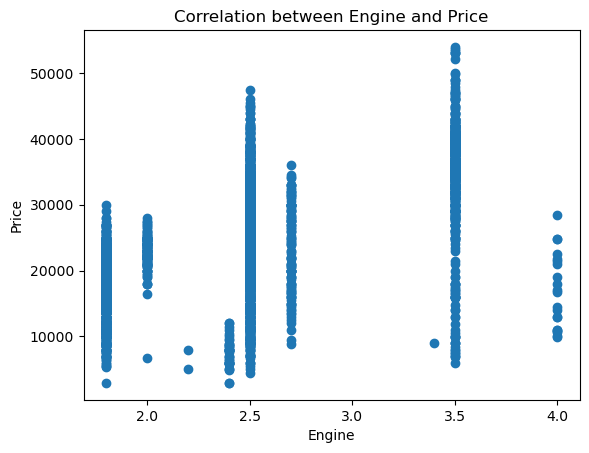

In [22]:
############################# Correlation between 'Engine' and 'Price': #############################
price = df_learn['price']
value = df_learn['Engine']

plt.scatter(value, price)
plt.xlabel('Engine')
plt.ylabel('Price')
plt.title('Correlation between Engine and Price')

corr_coef = value.corr(price)

print('Correlation Coefficient:', corr_coef)
print("This code examines the relationship between engine and the price of cars and calculates the correlation coefficient to assess the degree of dependence between these two variables.")


plt.show()

In [23]:
############################# Learning Machine(Linear Regression): #############################

X = df_learn.drop(['price'], axis=1)
y = df_learn['price']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

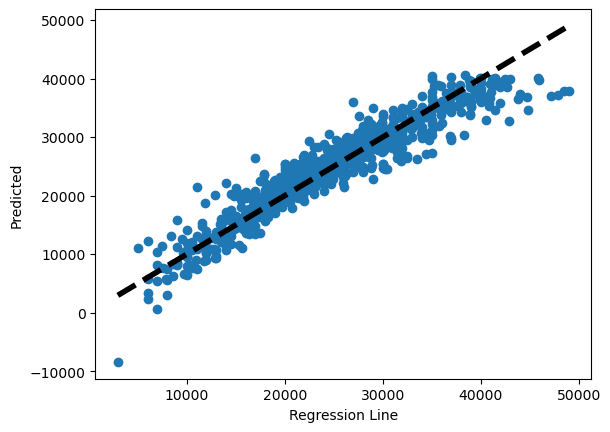

Mean squared error: 7143497.667136641
R-squared score: 0.8946284474352751


In [24]:
#corr regression
y_pred = model.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 4)
ax.set_xlabel('Regression Line')
ax.set_ylabel('Predicted')
plt.show()

print("Mean squared error:", mse)
print("R-squared score:", r2)

In [25]:
############################# Performance evaluation of the selected model: #############################
threshold = df_learn['price'].quantile(0.7) # 70% of the prices in the dataset fall

In [26]:
filtered_df = df_learn[df_learn['price'] <= threshold] # Filter out the top 30% of the most expensive cars
display(filtered_df)

MPG  Engine  accidents  owners  year  price  mileage  model_Camry  \
1     0.717949     2.5          1       2  2019  18182   103386            1   
2     0.789474     1.8          0       1  2022  21950    21320            0   
4     0.789474     1.8          0       1  2020  17749    57515            0   
5     0.789474     1.8          1       2  2020  18979    62134            0   
7     0.789474     1.8          0       1  2021  18999    57144            0   
...        ...     ...        ...     ...   ...    ...      ...          ...   
5951  0.785714     2.5          0       1  2017  22998    59042            0   
5954  0.777778     1.8          0       2  2017  18999    67945            0   
5955  0.714286     2.5          0       2  2016  20998    37479            1   
5956  0.714286     2.5          1       2  2016  14644   129263            1   
5957  0.717949     2.5          0       1  2021  25984    30901            1   

      model_Corolla  model_RAV4  model_Tacoma  
1                 0           0             0  
2                 1           0             0  
4                 1           0             0  
5                 1           0             0  
7                 1           0             0  
...             ...         ...           ...  
5951              0           1             0  
5954              1           0             0  
5955              0           0             0  
5956              0           0             0  
5957              0           0             0  

[3066 rows x 11 columns]

In [27]:
############################# Cross-Validation: #############################
scores = cross_val_score(model,X,y)
print("Cross Validation Validity Values: {}".format(scores))
print("Cross-validation is a valuable tool for model evaluation and can help prevent overfitting and aid in hyperparameter tuning.")

Cross Validation Validity Values: [0.86098628 0.87893995 0.88912575 0.88865758 0.89087603]
Cross-validation is a valuable tool for model evaluation and can help prevent overfitting and aid in hyperparameter tuning.


In [28]:
############################# Learning Machine for 70% from original Data Frame(df_learn): #############################
X = filtered_df.drop(['price'], axis=1)
y = filtered_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [29]:
############################# Cross-Validation for 70%: #############################
scores = cross_val_score(model,X,y)
print("Cross Validation Validity Values: {}".format(scores))

Cross Validation Validity Values: [0.85723715 0.8957893  0.898146   0.90846899 0.9003063 ]


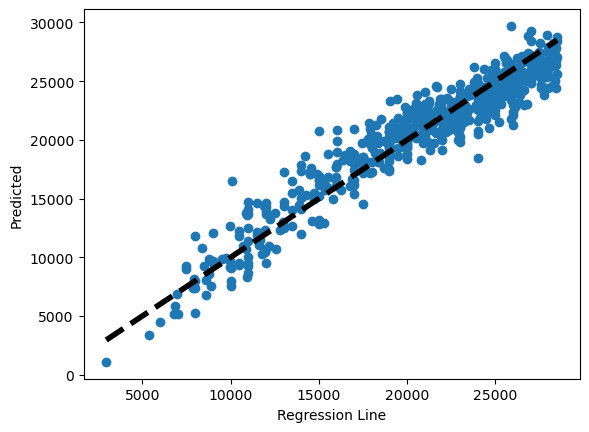

Mean squared error: 2804277.433266712
R-squared score: 0.9042248701479308
I would like to see that the model achieved more accurate results when trained with 70% of the data.


In [30]:
############################# Correlation of  our regression: ##############################

y_pred = model.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 4)
ax.set_xlabel('Regression Line')
ax.set_ylabel('Predicted')
plt.show()

print("Mean squared error:", mse)
print("R-squared score:", r2)
print("I would like to see that the model achieved more accurate results when trained with 70% of the data.")

In [31]:
df_learn = df_learn.drop('price', axis=1)
display(df_learn)

MPG  Engine  accidents  owners  year  mileage  model_Camry  \
1     0.717949     2.5          1       2  2019   103386            1   
2     0.789474     1.8          0       1  2022    21320            0   
4     0.789474     1.8          0       1  2020    57515            0   
5     0.789474     1.8          1       2  2020    62134            0   
7     0.789474     1.8          0       1  2021    57144            0   
...        ...     ...        ...     ...   ...      ...          ...   
5954  0.777778     1.8          0       2  2017    67945            0   
5955  0.714286     2.5          0       2  2016    37479            1   
5956  0.714286     2.5          1       2  2016   129263            1   
5957  0.717949     2.5          0       1  2021    30901            1   
5958  0.771429     2.5          0       1  2021    11205            0   

      model_Corolla  model_RAV4  model_Tacoma  
1                 0           0             0  
2                 1           0             0  
4                 1           0             0  
5                 1           0             0  
7                 1           0             0  
...             ...         ...           ...  
5954              1           0             0  
5955              0           0             0  
5956              0           0             0  
5957              0           0             0  
5958              0           1             0  

[4376 rows x 10 columns]

In [32]:
predictions = model.predict(df_learn)
predictions = predictions.astype(int)

df_predict = df_4_most_popular.copy()
df_predict.loc[:, "Prediction of price"] = predictions
df_predict.loc[:, "Difference"] = df_predict["price"] - df_predict["Prediction of price"]

In [33]:
display(df_predict)

Style             Exterior Color Interior Color       MPG  Engine  \
1     Sedan  Celestial Silver Metallic          Black  0.717949     2.5   
2     Sedan           Black Sand Pearl     Light Gray  0.789474     1.8   
4     Sedan    Classic Silver Metallic     Light Gray  0.789474     1.8   
5     Sedan    Classic Silver Metallic     Light Gray  0.789474     1.8   
7     Sedan           Black Sand Pearl          Black  0.789474     1.8   
...     ...                        ...            ...       ...     ...   
5954  Sedan                        Red          Black  0.777778     1.8   
5955  Sedan           Cosmic Gray Mica          Black  0.714286     2.5   
5956  Sedan    Midnight Black Metallic          Black  0.714286     2.5   
5957  Sedan  Celestial Silver Metallic          Black  0.717949     2.5   
5958    SUV     Magnetic Gray Metallic          Black  0.771429     2.5   

     Drive Type Fuel Type Transmission  accidents  owners  year   brand  \
1           FWD       Gas    Automatic          1       2  2019  Toyota   
2           FWD       Gas    Automatic          0       1  2022  Toyota   
4           FWD       Gas    Automatic          0       1  2020  Toyota   
5           FWD       Gas    Automatic          1       2  2020  Toyota   
7           FWD       Gas    Automatic          0       1  2021  Toyota   
...         ...       ...          ...        ...     ...   ...     ...   
5954        FWD       Gas    Automatic          0       2  2017  Toyota   
5955        FWD       Gas    Automatic          0       2  2016  Toyota   
5956        FWD       Gas    Automatic          1       2  2016  Toyota   
5957        FWD       Gas    Automatic          0       1  2021  Toyota   
5958        FWD       Gas    Automatic          0       1  2021  Toyota   

        model  price  mileage  Prediction of price  Difference  
1       Camry  18182   103386                18869        -687  
2     Corolla  21950    21320                23648       -1698  
4     Corolla  17749    57515                20045       -2296  
5     Corolla  18979    62134                18963          16  
7     Corolla  18999    57144                20907       -1908  
...       ...    ...      ...                  ...         ...  
5954  Corolla  18999    67945                16644        2355  
5955    Camry  20998    37479                20408         590  
5956    Camry  14644   129263                14943        -299  
5957    Camry  25984    30901                25231         753  
5958     RAV4  30998    11205                28838        2160  

[4376 rows x 17 columns]

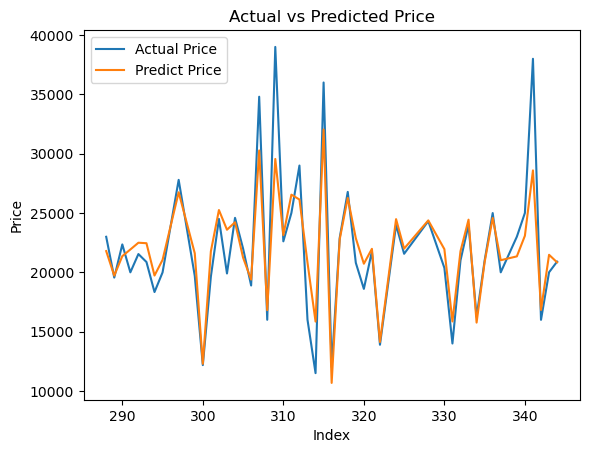

In [34]:
############################# Сorrelation or association between the actual prices and the predicted prices: ##############################
plt.plot(df_predict["price"][250:300], label="Actual Price")
plt.plot(df_predict["Prediction of price"][250:300], label="Predict Price")

plt.xlabel("Index")
plt.ylabel("Price")
plt.title("Actual vs Predicted Price")

plt.legend()
plt.show()

In [35]:
# СONCLUSION:
# We are assuming that wemanaged to achieve our goal based on ourresearch and 
# machine learning algorithm weare able to predict the correct and fair pricefor 
# our Toyota cars based on mechanicalparts and price-dependable features. Thisgives 
# us various functions for example toindicate a correct price for a potential buyer.